In [2]:
#! pip install nibabel
! pip install patchify

In [3]:
from patchify import patchify, unpatchify
import numpy as np

In [4]:
#! unzip /content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images.zip

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt
patient_t1_image =  nib.load("/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t1/IXI136-HH-1452-T1_fcm.nii.gz")
patient_t1_image_data = patient_t1_image.get_fdata()

In [6]:
patient_t2_image = nib.load("/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t2/IXI136-HH-1452-T2_reg_fcm.nii.gz")
patient_t2_image_data = patient_t2_image.get_fdata()

In [7]:
patient_t1_image_data.shape

(120, 120, 90)

In [8]:
patch_image = patchify(patient_t1_image_data, (64,64,16),step =(56,56,16))

In [60]:
patch_image.shape

(2, 2, 5, 64, 64, 16)

In [11]:
whole_image = unpatchify(patch_image,(120, 120, 80))

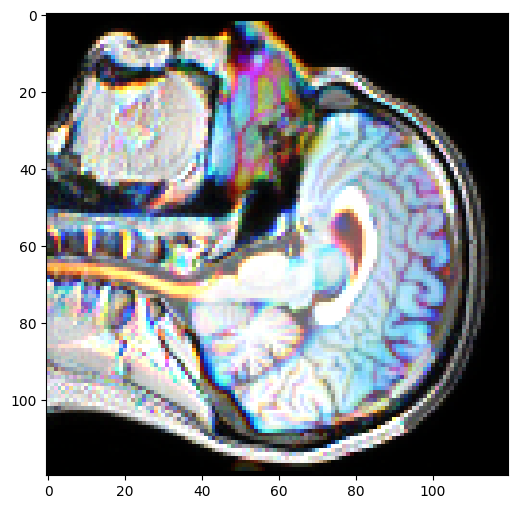

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(whole_image[:,:,45:48])

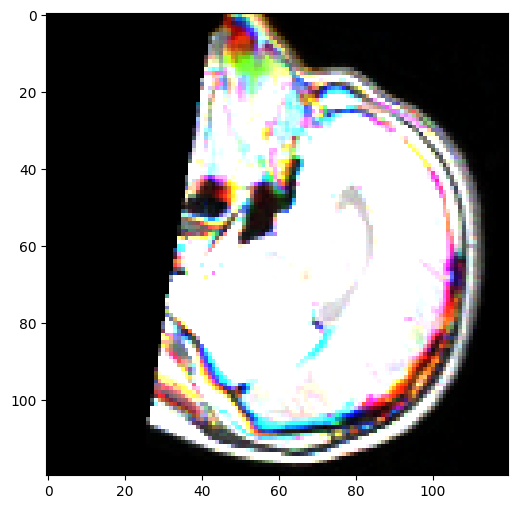

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(patient_t2_image_data[:,:,44:47])

In [14]:
import os
import shutil

In [15]:
def move_files(t1dst,t1src,t2dst,t2src,t1_files_to_move,t2_files_to_move):

  for t1file in t1_files_to_move:
    movefile = t1src + t1file
    todest = t1dst + t1file
    shutil.move(movefile, todest)

  for t2file in t2_files_to_move:
    movefile = t2src + t2file
    todest = t2dst + t2file
    shutil.move(movefile,todest)

  return True

In [16]:
t1_files_to_move = os.listdir("/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t1")
t2_files_to_move = os.listdir("/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t2")

In [17]:
'''test_status = move_files(
    "/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_cv_images/t1/",
    "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t1/",
    "/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_cv_images/t2/",
    "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t2/",
    t1_files_to_move[:5],
    t2_files_to_move[:5]
)'''

'test_status = move_files(\n    "/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_cv_images/t1/",\n    "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t1/",\n    "/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_cv_images/t2/",\n    "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images/t2/",\n    t1_files_to_move[:5],\n    t2_files_to_move[:5]\n)'

In [18]:
#list(np.random.choice(np.array(t2_files_to_move[1:20]),size=6,replace=False))

In [19]:
#np.random.randint(0,3)

In [20]:
from PIL import Image
import numpy as np

In [21]:
'''def data_generator(base_path,t1_images,t2_images,crop_size,chanel_size,batch_size=6):

  num_images = len(t1_images)
  t1_images = np.array(t1_images)
  t2_images = np.array(t2_images)

  crop_height, crop_width, crop_depth = crop_size

  while True:

    for offset in range(0,num_images,batch_size):

      t1_batch_images = list(np.random.choice(t1_images,size=batch_size
                                              #,replace=False,
                                              ))
      t2_batch_images = list(np.random.choice(t2_images,size=batch_size
                                              #,replace=False
                                              ))

      t1_cropped_images_batch = list()
      t2_cropped_images_batch = list()

      t1_images_path = os.path.join(base_path,"t1")
      t2_images_path = os.path.join(base_path,"t2")

      for t1_img,t2_img in zip(t1_batch_images,t2_batch_images):

        initial_channel_selection = np.random.randint(0,75)
        final_channel_selection = initial_channel_selection + chanel_size

        random_heightpixel_picker = np.random.randint(0,57)
        random_widthpixel_picker = np.random.randint(0,57)

        t1_filepath = os.path.join(base_path,"t1",t1_img)
        load_t1_img = nib.load(t1_filepath)
        t1_image_data = load_t1_img.get_fdata()

        t2_filepath = os.path.join(base_path,"t2",t2_img)
        load_t2_img = nib.load(t2_filepath)
        t2_image_data = load_t2_img.get_fdata()


        t1_cropped_image = t1_image_data[random_heightpixel_picker:int(random_heightpixel_picker+crop_height),random_widthpixel_picker:int(random_widthpixel_picker+crop_width),initial_channel_selection:final_channel_selection]
        t2_cropped_image = t2_image_data[random_heightpixel_picker:(random_heightpixel_picker+crop_height),random_widthpixel_picker:(random_widthpixel_picker+crop_width),initial_channel_selection:final_channel_selection]


        t1_cropped_images_batch.append(t1_cropped_image)
        t2_cropped_images_batch.append(t2_cropped_image)

      yield np.array(t1_cropped_images_batch)[...,np.newaxis], np.array(t2_cropped_images_batch)[...,np.newaxis]

'''

'def data_generator(base_path,t1_images,t2_images,crop_size,chanel_size,batch_size=6):\n\n  num_images = len(t1_images)\n  t1_images = np.array(t1_images)\n  t2_images = np.array(t2_images)\n\n  crop_height, crop_width, crop_depth = crop_size\n\n  while True:\n\n    for offset in range(0,num_images,batch_size):\n\n      t1_batch_images = list(np.random.choice(t1_images,size=batch_size\n                                              #,replace=False,\n                                              ))\n      t2_batch_images = list(np.random.choice(t2_images,size=batch_size\n                                              #,replace=False\n                                              ))\n\n      t1_cropped_images_batch = list()\n      t2_cropped_images_batch = list()\n\n      t1_images_path = os.path.join(base_path,"t1")\n      t2_images_path = os.path.join(base_path,"t2")\n\n      for t1_img,t2_img in zip(t1_batch_images,t2_batch_images):\n\n        initial_channel_selection = np.random.randi

In [22]:
def data_generator(base_path,t1_images,t2_images,crop_size,batch_size=6):

  num_images = len(t1_images)
  t1_images = np.array(t1_images)
  t2_images = np.array(t2_images)

  crop_height, crop_width, crop_depth = crop_size

  while True:

    for offset in range(0,num_images,batch_size):

      t1_batch_images = list(np.random.choice(t1_images,size=batch_size
                                              #,replace=False,
                                              ))
      t2_batch_images = list(np.random.choice(t2_images,size=batch_size
                                              #,replace=False
                                              ))

      t1_cropped_images_batch = list()
      t2_cropped_images_batch = list()

      t1_images_path = os.path.join(base_path,"t1")
      t2_images_path = os.path.join(base_path,"t2")

      for t1_img,t2_img in zip(t1_batch_images,t2_batch_images):


        t1_filepath = os.path.join(base_path,"t1",t1_img)
        load_t1_img = nib.load(t1_filepath)
        t1_image_data = load_t1_img.get_fdata()

        t2_filepath = os.path.join(base_path,"t2",t2_img)
        load_t2_img = nib.load(t2_filepath)
        t2_image_data = load_t2_img.get_fdata()

        patches_t1_image = patchify(t1_image_data,(60,60,16),step=(60,60,16))
        patches_t2_image = patchify(t2_image_data,(60,60,16),step=(60,60,16))

        a0,a1,a2,_,_,_ = patches_t1_image.shape
        x_patch_picker = np.random.randint(0,a0)
        y_patch_picker = np.random.randint(0,a1)
        z_patch_picker = np.random.randint(0,a2)

        t1_cropped_image = patches_t1_image[x_patch_picker,y_patch_picker,z_patch_picker,...]
        t2_cropped_image =patches_t2_image[x_patch_picker,y_patch_picker,z_patch_picker,...]

        t1_cropped_images_batch.append(t1_cropped_image)
        t2_cropped_images_batch.append(t2_cropped_image)

      yield np.array(t1_cropped_images_batch)[...,np.newaxis], np.array(t2_cropped_images_batch)[...,np.newaxis]



In [23]:
def test_data_generator(base_path,t1_images,t2_images,crop_size,batch_size=6):

  num_images = len(t1_images)
  t1_images = np.array(t1_images)
  t2_images = np.array(t2_images)

  crop_height, crop_width, crop_depth = crop_size

  while True:

    for offset in range(0,num_images,batch_size):

      t1_batch_images = list(np.random.choice(t1_images,size=batch_size
                                              #,replace=False,
                                              ))
      t2_batch_images = list(np.random.choice(t2_images,size=batch_size
                                              #,replace=False
                                              ))

      t1_cropped_images_batch = list()
      t2_cropped_images_batch = list()

      t1_images_path = os.path.join(base_path,"t1")
      t2_images_path = os.path.join(base_path,"t2")

      for t1_img,t2_img in zip(t1_batch_images,t2_batch_images):

        t1_filepath = os.path.join(base_path,"t1",t1_img)
        load_t1_img = nib.load(t1_filepath)
        t1_image_data = load_t1_img.get_fdata()

        t2_filepath = os.path.join(base_path,"t2",t2_img)
        load_t2_img = nib.load(t2_filepath)
        t2_image_data = load_t2_img.get_fdata()

        patches_t1_image = patchify(t1_image_data,(60,60,16),step=(60,60,16))
        patches_t2_image = patchify(t2_image_data,(60,60,16),step=(60,60,16))

        a0,a1,a2,_,_,_ = patches_t1_image.shape
        x_patch_picker = np.random.randint(0,a0)
        y_patch_picker = np.random.randint(0,a1)
        z_patch_picker = np.random.randint(0,a2)

        t1_cropped_image = patches_t1_image[x_patch_picker,y_patch_picker,z_patch_picker,...]
        t2_cropped_image =patches_t2_image[x_patch_picker,y_patch_picker,z_patch_picker,...]

        t1_cropped_images_batch.append(t1_cropped_image)
        t2_cropped_images_batch.append(t2_cropped_image)

      yield np.array(t1_cropped_images_batch)[...,np.newaxis]



In [24]:
from keras.layers import Conv3D, Conv3DTranspose, BatchNormalization, MaxPooling3D, MaxPooling2D,Conv2D,Conv2DTranspose
from keras.models import Sequential
from keras.layers import Input, UpSampling3D, UpSampling2D,Flatten
from keras.layers import ReLU, Concatenate
from keras.layers import Reshape
import tensorflow as tf
import keras
from keras.models import Model

In [25]:
def unet_down(filter_size,prev_layer,last=False):
  first_block_down = Conv3D(filters=filter_size,kernel_size=3,use_bias=False,padding="same")(prev_layer)
  first_block_down = BatchNormalization()(first_block_down)
  first_block_down = ReLU()(first_block_down)

  second_block_down = Conv3D(filters=filter_size,kernel_size=3,use_bias=False,padding="same")(first_block_down)
  second_block_down = BatchNormalization()(second_block_down)
  second_block_down = ReLU()(second_block_down)
  #second_block_down = Reshape()(second_block_down)
  if last == True:
    second_block_down = UpSampling3D(size=(2,2,2))(second_block_down)
  else:
    second_block_down = MaxPooling3D(pool_size =(2,2,2))(second_block_down)

  return second_block_down

In [26]:
def unet_up(filter_size,prev_layer,last=False):
  first_block = Conv3DTranspose(filters=filter_size,kernel_size=3,use_bias=False,padding="same")(prev_layer)
  first_block = BatchNormalization()(first_block)
  first_block = ReLU()(first_block)

  second_block = Conv3DTranspose(filters=filter_size,kernel_size=3,use_bias=False,padding="same")(first_block)
  second_block = BatchNormalization()(second_block)
  second_block = ReLU()(second_block)

  if last == False:
    second_block = UpSampling3D(size=(2,2,2))(second_block)

  return second_block

In [27]:
def try_model(input_shape):
  regression_unet_input = Input(shape=(input_shape))

  prev_layer_update = regression_unet_input

  filter_list = list((64,128,256,512,1024))
  for filter in filter_list:
    if filter == 1024:
      new_layer = unet_down(filter,prev_layer_update,last=True)
    else:
      new_layer = unet_down(filter,prev_layer_update)
    prev_layer_update = new_layer
  return Model(regression_unet_input,new_layer)

In [28]:
#try_model = try_model(input_shape= (64,64,3)+(1,))

In [29]:
#try_model.summary()

In [30]:
def create_regression_unet(input_image_shape):

  regression_unet_input = Input(shape=input_image_shape)

  #prev_layer_update = regression_unet_input
  regression_unet_first_block_down = unet_down(64,regression_unet_input)

  regression_unet_second_block_down = unet_down(128,regression_unet_first_block_down)

  regression_unet_third_block_down = unet_down(254,regression_unet_second_block_down)

  regression_unet_fourth_block_down = unet_down(512,regression_unet_third_block_down)

  regression_unet_fifth_block_down = unet_down(1024,regression_unet_fourth_block_down,last=True)

  regression_unet_one_block_up = unet_up(512,regression_unet_fifth_block_down)

  regression_unet_second_block_up = unet_up(256,regression_unet_one_block_up)

  regression_unet_third_block_up = unet_up(128,regression_unet_second_block_up)

  regression_unet_fourth_block_up = unet_up(64,regression_unet_third_block_up,last=True)

  regression_unet_out = Conv3D(filters=1,kernel_size=1)(regression_unet_fourth_block_up)
  regression_unet_out = ReLU()(regression_unet_out)

  return Model(regression_unet_input,regression_unet_out)

In [31]:
def mse_loss(t2_images_true,t2_images_pred):

  print(" t2 true shape ", t2_images_true.shape, "t2 pred shape", t2_images_pred.shape)
  mse = tf.keras.losses.Huber(name='huber_loss')
  #print(mse(y_true=t2_images_true,y_pred=t2_images_pred))
  return tf.reduce_mean(mse(y_true=t2_images_true,y_pred=t2_images_pred))

In [32]:
img_translation_optimizer = keras.optimizers.Adam(learning_rate=0.000001)

In [33]:
crop_size = (64,64,16)
regression_unet = create_regression_unet(input_image_shape=crop_size+(1,))
#regression_unet = create_regression_unet(input_image_shape=crop_size)

In [34]:
regression_unet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 16, 1)]   0         
                                                                 
 conv3d (Conv3D)             (None, 64, 64, 16, 64)    1728      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16, 64)    256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 16, 64)    0         
                                                                 
 conv3d_1 (Conv3D)           (None, 64, 64, 16, 64)    110592    
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 16, 64)    256       
 chNormalization)                                            

In [35]:
img_translation_checkpoint_dir = "/content/drive/MyDrive/img_translation_checkpoints"
checkpoint_prefix = os.path.join(img_translation_checkpoint_dir,"ckpt")
checkpoint = tf.train.Checkpoint(optimizer=img_translation_optimizer,model=regression_unet)

In [36]:
@tf.function
def train_step(t1_images_batch,t2_images_batch):

    with tf.GradientTape() as img_translation_tape:

      regression_unet.trainable = True
      t2_images_batch_pred = regression_unet(t1_images_batch,training=True)

      img_translation_loss = mse_loss(t2_images_true=t2_images_batch,t2_images_pred=t2_images_batch_pred)

      img_translation_gradients = img_translation_tape.gradient(img_translation_loss, regression_unet.trainable_variables)
      img_translation_optimizer.apply_gradients(zip(img_translation_gradients, regression_unet.trainable_variables))

    return t2_images_batch_pred,img_translation_loss

In [37]:
@tf.function
def cv_step(t1_cv_images_batch,t2_cv_images_batch):

  regression_unet.trainable = False

  t2_cv_images_batch_pred = regression_unet(t1_cv_images_batch,training=False)

  img_translation_cv_loss = mse_loss(t2_images_true=t2_cv_images_batch,t2_images_pred=t2_cv_images_batch_pred)

  return t2_cv_images_batch_pred,img_translation_cv_loss

In [38]:
epochs = 150
train_batch_size = 6
cv_batch_size = 6

In [39]:
callbacks = keras.callbacks.CallbackList(callbacks=[keras.callbacks.ReduceLROnPlateau(min_lr=0.000000001,verbose=1,patience=3)])

In [40]:
def train(epochs):

  train_base_path = "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_training_images"
  cv_base_path = "/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_cv_images"

  t1_train_images = os.listdir(os.path.join(train_base_path,"t1"))
  t2_train_images = os.listdir(os.path.join(train_base_path,"t2"))

  t1_cv_images = os.listdir(os.path.join(cv_base_path,"t1"))
  t2_cv_images = os.listdir(os.path.join(cv_base_path,"t2"))

  cv_datagen = data_generator(base_path=cv_base_path,t1_images=t1_cv_images,t2_images=t2_cv_images,crop_size=crop_size,
                              batch_size=cv_batch_size)

  train_datagen = data_generator(base_path=train_base_path,t1_images=t1_train_images,t2_images=t2_train_images,
                                 crop_size=crop_size,batch_size=train_batch_size)

  for epoch in range(epochs):

    time_step = 1

    for t1_images_batch,t2_images_batch in train_datagen:

      t2_images_batch_pred,img_translation_train_loss = train_step(t1_images_batch,t2_images_batch)

      if time_step > len(t1_train_images)//train_batch_size:
        break

      t1_cv_images_batch,t2_cv_images_batch = next(cv_datagen)
      t2_cv_images_batch_pred,img_translation_cv_loss = cv_step(t1_cv_images_batch,t2_cv_images_batch)

      print("Epoch: {} Time Step: {} Training Loss: {} Val Loss: {}".format(epoch,time_step,img_translation_train_loss,img_translation_cv_loss))

      callbacks.on_batch_end(time_step)
      time_step = time_step + 1

    if epoch>130 and epoch % 5  == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    if epoch%10 ==0:
      t1_cv_generator = test_data_generator(base_path=cv_base_path,t1_images=t1_cv_images,t2_images=t2_cv_images,crop_size=crop_size,
                              batch_size=cv_batch_size)
      test_image_batch = next(t1_cv_generator)
      generated_sample_images = tf.squeeze(regression_unet(test_image_batch,training=False),4)
      for i in range(generated_sample_images.shape[0]):
        plt.subplot(4,4,i+1)
        plt.imshow(generated_sample_images[i,:,:,0:3])
        plt.axis("off")
      plt.show()




In [41]:
#train(epochs)

In [42]:
latest_checkpoint_path = tf.train.latest_checkpoint("/content/drive/MyDrive/img_translation_checkpoints")

In [43]:
checkpoint.restore(latest_checkpoint_path)

In [44]:
testing_image_path = "/content/drive/MyDrive/datasets_ML/T1_and_T2_weighted_testing_images"
patient_t1_image_test =  nib.load("/content/drive/MyDrive/datasets_ML/T1_and_T2_wieghted_test_images/t1/IXI102-HH-1416-T1_fcm.nii.gz")
patient_t1_image_data_test = patient_t1_image_test.get_fdata()
test_batch = list()
test_batch.append(patient_t1_image_data_test[10:74,30:94,60:76])
#test_datagen = data_generator(base_path=testing_image_path,t1_images=t1_cv_images,t2_images=t2_cv_images,crop_size=crop_size,batch_size=cv_batch_size)
try_img = np.array(test_batch)[...,np.newaxis]

In [45]:
generated_sample_images = tf.squeeze(regression_unet(try_img,training=False),4)
generated_shape = generated_sample_images.shape

TensorShape([1, 64, 64, 16])

In [53]:
def generate_complete_image(pick_image):
  predicted_patches =[]
  patches_image = patchify(pick_image,(64,64,16), step= (56,56,15))
  a0,a1,a2,_,_,_ = patches_image.shape
  for i in range(a0):
    for j in range(a1):
      for k in range(a2):
        single_patch = np.array(patches_image[i,j,k,...])[...,np.newaxis]

        single_patch_prediction = tf.squeeze(regression_unet(single_patch.reshape(1,64, 64, 16, 1),training =False),[0,4])

        plt.figure(figsize=(4,4))
        plt.imshow(single_patch_prediction[:,:,13:16])
        plt.show()

        predicted_patches.append(single_patch_prediction)

  predicted_patches = np.array(predicted_patches)
  print("np array created", predicted_patches.shape)
  predicted_patches_reshape = np.reshape(predicted_patches,(a0,a1,a2,64,64,16))
  print("predicted patch reshaped", predicted_patches_reshape.shape)
  reconstruct_image = unpatchify(predicted_patches_reshape, (120,120,80))
  print("reconstructed image")
  plt.figure(figsize=(6,6))
  plt.imshow(reconstruct_image[:,:,45:48])
  return reconstruct_image

 /n shape prediction  (64, 64, 16)


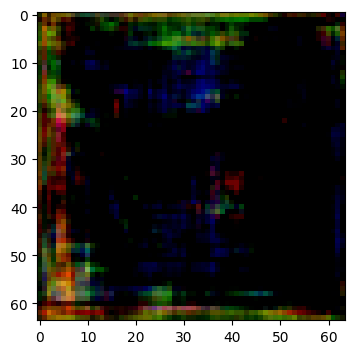

 /n shape prediction  (64, 64, 16)


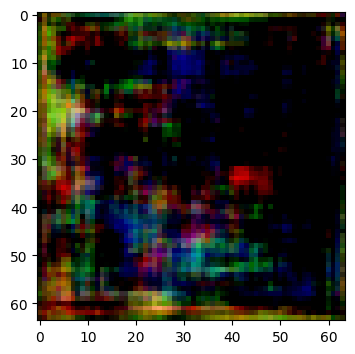

 /n shape prediction  (64, 64, 16)


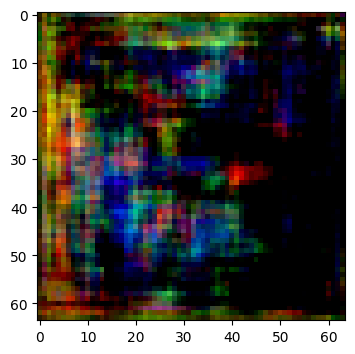

 /n shape prediction  (64, 64, 16)


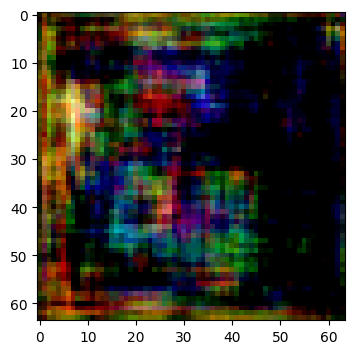

 /n shape prediction  (64, 64, 16)


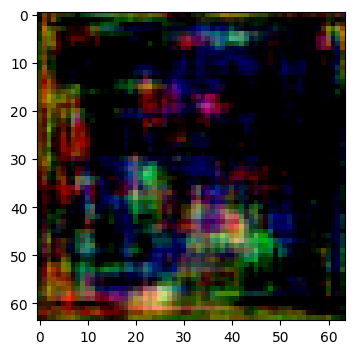

 /n shape prediction  (64, 64, 16)


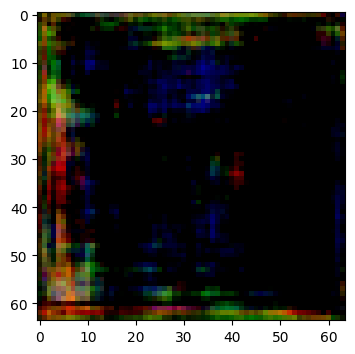

 /n shape prediction  (64, 64, 16)


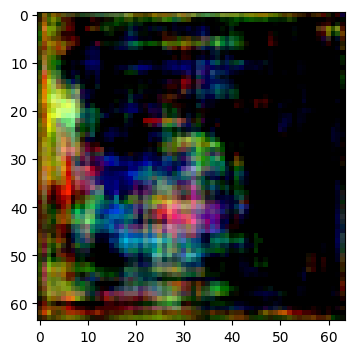

 /n shape prediction  (64, 64, 16)


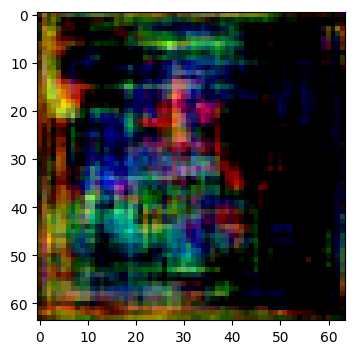

 /n shape prediction  (64, 64, 16)


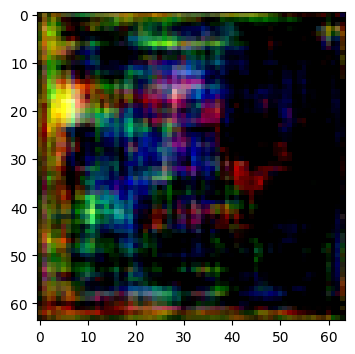

 /n shape prediction  (64, 64, 16)


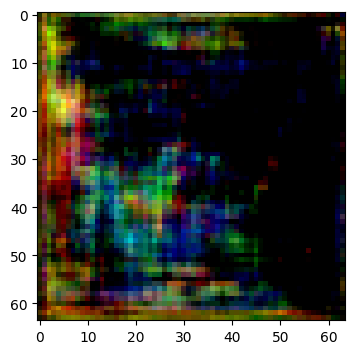

 /n shape prediction  (64, 64, 16)


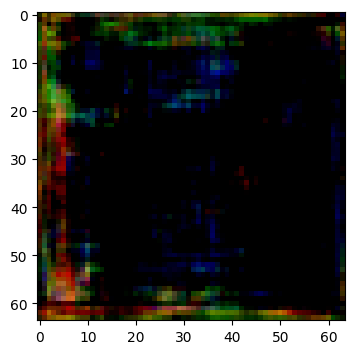

 /n shape prediction  (64, 64, 16)


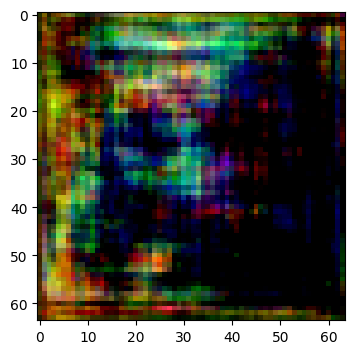

 /n shape prediction  (64, 64, 16)


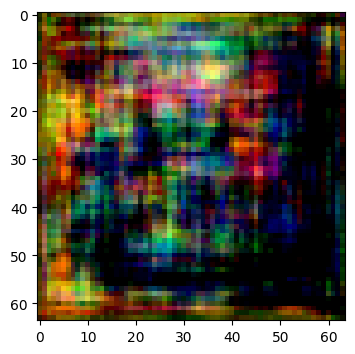

 /n shape prediction  (64, 64, 16)


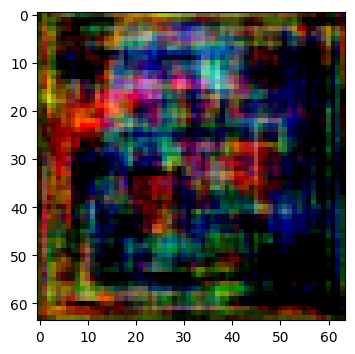

 /n shape prediction  (64, 64, 16)


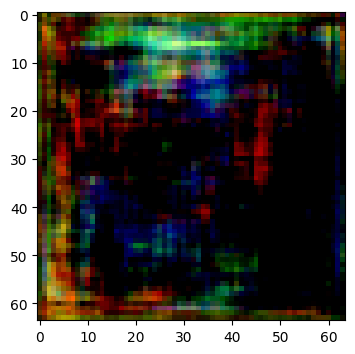

 /n shape prediction  (64, 64, 16)


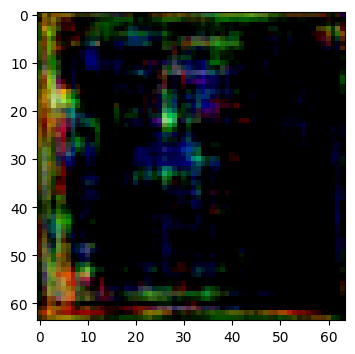

 /n shape prediction  (64, 64, 16)


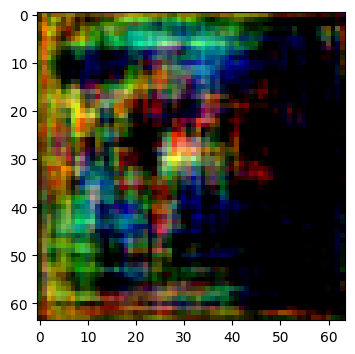

 /n shape prediction  (64, 64, 16)


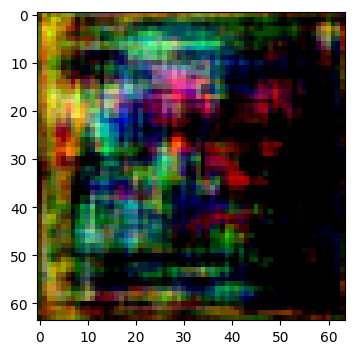

 /n shape prediction  (64, 64, 16)


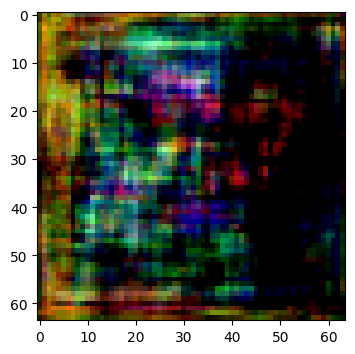

 /n shape prediction  (64, 64, 16)


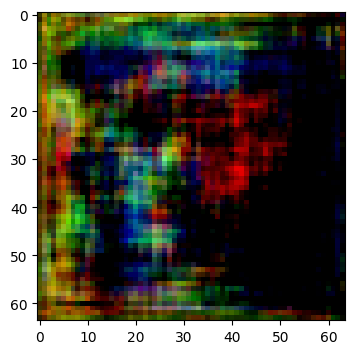

np array created (20, 64, 64, 16)
predicted patch reshaped (2, 2, 5, 64, 64, 16)
reconstructed image


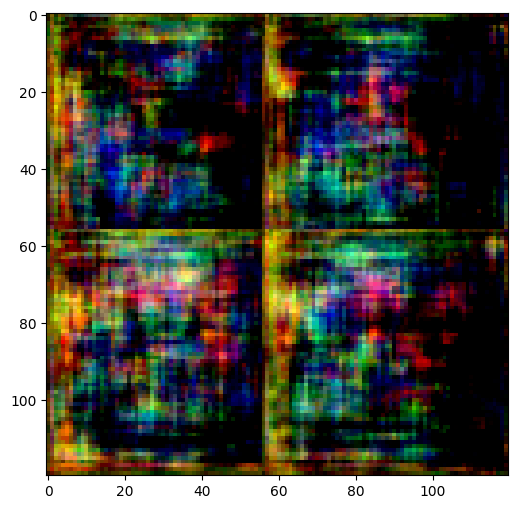

In [54]:
image = generate_complete_image(patient_t1_image_data_test)

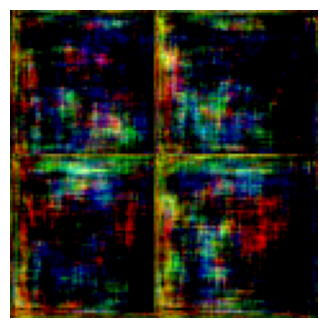

In [59]:
plt.figure(figsize=(4,4))
plt.imshow(image[:,:,77:80])
plt.axis("off")

plt.show()

In [56]:
#generated_sample_images = regression_unet(try_img,training=False)
#plt.figure(figsize=(6,6))
#plt.imshow(generated_sample_images[:,:,:,:])

for i in range(generated_sample_images.shape[0]):
  plt.figure(figsize=(4,4))
  plt.imshow(generated_sample_images[i,:,:,13:16])
  plt.axis("off")

plt.show()

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

<Figure size 400x400 with 0 Axes>